In [1]:
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
Roth_data=pd.read_csv("C:/Users/ahw617/Documents/Esma Kurban PhD/Roth Data/5sphere_20dim.csv",delimiter=",",names=['fi','X_1', 'Y_1', 'Z_1','X_2', 'Y_2', 'Z_2','X_3', 'Y_3', 'Z_3','X_4','Y_4', 'Z_4', 'X_5','Y_5', 'Z_5', 'D_1','D_2','D_3','D_4','D_5'])

Roth_data=Roth_data[['fi','X_1', 'Y_1', 'Z_1','D_1','X_2', 'Y_2', 'Z_2','D_2','X_3', 'Y_3', 'Z_3','D_3','X_4','Y_4', 'Z_4','D_4', 'X_5','Y_5', 'Z_5','D_5']]
Roth_data.head()

,fi,X_1,Y_1,Z_1,D_1,X_2,Y_2,Z_2,D_2,X_3,...,Z_3,D_3,X_4,Y_4,Z_4,D_4,X_5,Y_5,Z_5,D_5
0,0.726481,0,0,0,2.0,0.349044,0.265928,0.972677,1.561852,0.349044,...,0.337739,2.000000,0.000000,0.000000e+00,0.000000,2.000000,0.0,0.0,0.0,2.0
1,0.720714,0,0,0,2.0,0.000000,0.000000,1.368899,1.712087,-0.235701,...,1.058083,2.000000,-0.158910,-1.479915e-01,0.840311,2.000000,0.0,0.0,0.0,2.0
2,0.719610,0,0,0,2.0,0.141595,0.000000,0.787455,1.383659,0.300092,...,0.628130,2.000000,0.300092,-1.241492e-16,-0.232874,1.931646,0.0,0.0,0.0,2.0
3,0.718265,0,0,0,2.0,-0.182315,0.659939,0.957302,1.506856,-0.454809,...,0.641036,1.610434,-0.153927,4.882532e-01,0.080096,0.792165,0.0,0.0,0.0,2.0
4,0.710951,0,0,0,2.0,0.000000,0.000000,0.177737,1.610086,-0.013070,...,0.071688,2.000000,-0.464868,-1.144201e+00,0.696677,0.710946,0.0,0.0,0.0,2.0


In [10]:
predicted=pd.read_csv("C:/Users/ahw617/Documents/Esma Kurban PhD/LAMMPS/5-sphere/predicted_shapes_Adrian/Predictedshapes.csv",delimiter=",",names=['X_1', 'Y_1', 'Z_1','D_1','X_2', 'Y_2', 'Z_2','D_2','X_3', 'Y_3', 'Z_3','D_3','X_4','Y_4', 'Z_4','D_4', 'X_5','Y_5', 'Z_5','D_5'])
predicted.head()

,X_1,Y_1,Z_1,D_1,X_2,Y_2,Z_2,D_2,X_3,Y_3,Z_3,D_3,X_4,Y_4,Z_4,D_4,X_5,Y_5,Z_5,D_5
0,0.0,0.0,0.0,2.0,-0.358270,-0.040907,0.822792,1.847334,-0.370235,-0.010951,0.536837,1.965690,-0.477266,0.086340,0.172465,1.982519,-0.669190,0.220112,-0.119617,1.911448
1,0.0,0.0,0.0,2.0,-0.308417,0.031962,0.950709,1.834269,-0.299378,0.078609,0.708982,1.939500,-0.395769,0.191318,0.360096,1.981000,-0.598061,0.320130,0.006526,1.918847
2,0.0,0.0,0.0,2.0,-0.304873,-0.009877,0.876307,1.856506,-0.288821,0.028779,0.588636,1.983065,-0.387274,0.138419,0.225635,1.996587,-0.608225,0.284219,-0.094863,1.930648
3,0.0,0.0,0.0,2.0,-0.296242,0.045465,0.944322,1.838340,-0.272835,0.094742,0.667378,1.985758,-0.366113,0.221164,0.321156,2.018030,-0.567136,0.361928,-0.014410,1.998220
4,0.0,0.0,0.0,2.0,-0.281563,0.045798,0.917011,1.847648,-0.252760,0.096006,0.627066,1.994494,-0.343894,0.222802,0.282793,2.014620,-0.545959,0.364466,-0.036349,2.011890


In [14]:
def plot_sphere(shape,shape_id,n=5):
        
        fig=plt.figure(figsize=(5,5))
        ax=fig.add_subplot(111,projection='3d')
        u=np.linspace(0,2*np.pi,100)
        v=np.linspace(0,np.pi,100)
        color=['r','b','y','m','c']
        
        for i in range(n):
            x=shape[4*i]+shape[4*i+3]*np.outer(np.cos(u),np.sin(v))
            y=shape[4*i+1]+shape[4*i+3]*np.outer(np.sin(u),np.sin(v))
            z=shape[4*i+2]+shape[4*i+3]*np.outer(np.ones(np.size(u)),np.cos(v))
            ax.plot_surface(x,y,z,rstride=5,cstride=5,color=color[i])
        
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.set_zlim(-3, 3)
        ax.set_title('molecule'+str(shape_id+1))
        ax.view_init(0,45)

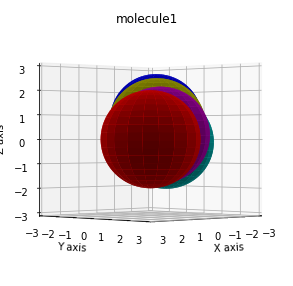

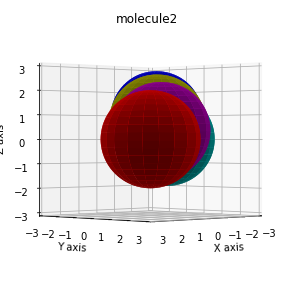

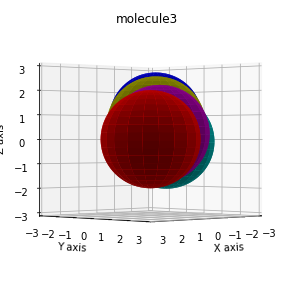

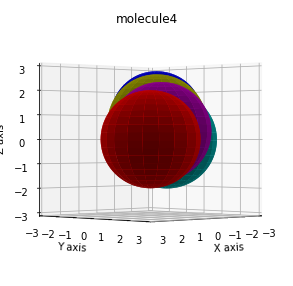

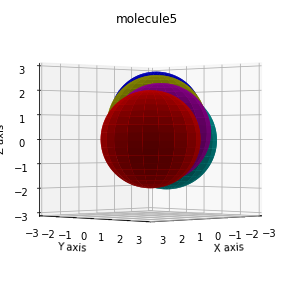

In [15]:
for i in range(5):
    shape=predicted.iloc[i,:]
    plot_sphere(shape,i)

In [16]:
def MonteCarlo_volume_com(shape,ns,nl):
    
    l=len(shape)
    Volume_list=[]
    com=np.zeros((nl,3))
    xlist, ylist, zlist=shape[:,0],shape[:,1],shape[:,2]
    dmax=np.max(shape[:,3])
    xmin=np.min(xlist)-dmax/2
    xmax=np.max(xlist)+dmax/2
    ymin=np.min(ylist)-dmax/2
    ymax=np.max(ylist)+dmax/2
    zmin=np.min(zlist)-dmax/2
    zmax=np.max(zlist)+dmax/2
    box_volume=(xmax-xmin)*(ymax-ymin)*(zmax-zmin)
    
    for i in range(nl):
        V=0
        j=0
        xcom=0
        ycom=0
        zcom=0
        while j<=ns:
            counter=0
            xv=xmin+random.uniform(0,1)*(xmax-xmin)
            yv=ymin+random.uniform(0,1)*(ymax-ymin)
            zv=zmin+random.uniform(0,1)*(zmax-zmin)
            for k in range(l):
                if np.sqrt((xv-shape[k,0])**2+(yv-shape[k,1])**2+(zv-shape[k,2])**2)<=shape[k,3]/2:
                        counter+=1
            if counter>0:
                V+=1
                xcom+=xv
                ycom+=yv
                zcom+=zv
            j+=1
                
        volume=box_volume*V/ns
        com[i]=[xcom/V, ycom/V, zcom/V]
        Volume_list.append(volume)
        
    mean_volume=np.mean(Volume_list)
    error=np.std(Volume_list,ddof=1)
    mean_com=com.mean(axis=0)
    return mean_volume,error,list(mean_com)
    #print('Particle volume: {}\nerror: {}\nParticle center of mass: {}'.format(mean_volume, error, mean_com))
    

In [17]:
def MonteCarlo_inertia(shape,ns,nl,m,com):
    
    l=len(shape)
    xlist, ylist, zlist=shape[:,0],shape[:,1],shape[:,2]
    dmax=np.max(shape[:,3])
    xmin=np.min(xlist)-dmax/2
    xmax=np.max(xlist)+dmax/2
    ymin=np.min(ylist)-dmax/2
    ymax=np.max(ylist)+dmax/2
    zmin=np.min(zlist)-dmax/2
    zmax=np.max(zlist)+dmax/2
    
    I=np.zeros((nl,6))
    for i in range(nl):
        I_xx=0
        I_yy=0
        I_zz=0
        I_xy=0
        I_xz=0
        I_yz=0
        V=0
        j=0    
            
        while j<=ns:
            counter=0
            xv=xmin+random.uniform(0,1)*(xmax-xmin)
            yv=ymin+random.uniform(0,1)*(ymax-ymin)
            zv=zmin+random.uniform(0,1)*(zmax-zmin)
            for k in range(l):
                if np.sqrt((xv-shape[k,0])**2+(yv-shape[k,1])**2+(zv-shape[k,2])**2)<=shape[k,3]/2:
                        counter+=1
            if counter>0:
                V+=1
                I_xx+=((com[1]-yv)**2+(com[2]-zv)**2)
                I_yy+=((com[0]-xv)**2+(com[2]-zv)**2)
                I_zz+=((com[0]-xv)**2+(com[1]-yv)**2)
                I_xy=I_xy-(com[0]-xv)*(com[1]-yv)
                I_xz=I_xz-(com[0]-xv)*(com[2]-zv)
                I_yz=I_yz-(com[1]-yv)*(com[2]-zv)
            j+=1

        I[i]=[I_xx,I_yy,I_zz,I_xy,I_xz,I_yz]
        I[i]=[key*m/V for key in I[i]]
            
    mean_I=I.mean(axis=0)
    return list(mean_I)
    #print('Particle moment of inertia: {}'.format(mean_I))

In [18]:
list_of_test_shapes=[0,1,2,3,4]

list_of_names=['molecule'+str(key+1) for key in list_of_test_shapes]

array_of_test_shapes=[np.array(predicted.iloc[key,:]).reshape((5,4)) for key in list_of_test_shapes]

molecules_info={'molecule_name':list_of_names, 'shape_array':array_of_test_shapes}

df=pd.DataFrame(data=molecules_info)
df=df.set_index('molecule_name')

In [19]:
df.head()

,shape_array
molecule_name,
molecule1,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.3582..."
molecule2,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.3084..."
molecule3,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.3048..."
molecule4,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.2962..."
molecule5,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.2815..."


In [45]:
molecule_volume=[]
volume_error=[]
molecule_com=[]

start_time=time.time()
for shape in df['shape_array']:
    
    volume, error, com=MonteCarlo_volume_com(shape,10000000,5)
    molecule_volume.append(volume)
    volume_error.append(error)
    molecule_com.append(com)
    
print('Time for calculation of molecule volume and center of mass: {} sec'.format(time.time()-start_time))

df['molecule_volume']=molecule_volume
df['volume_error']=volume_error
df['molecule_com']=molecule_com

Time for calculation of molecule volume and center of mass: 4726.727665424347 sec


In [22]:
volume5, error5, com5=MonteCarlo_volume_com(df.loc['molecule5','shape_array'],10000000,5)

In [23]:
print(volume5, error5, com5)

8.309291931468508 0.0028150066595720342 [-0.279880463011221, 0.14990950891263957, 0.2753857347650968]


In [47]:
molecule_inertia=[]

start_time=time.time()
for index,row in df.iterrows():
    
    moment_of_inertia=MonteCarlo_inertia(df.loc[index,'shape_array'],10000000,5,1,df.loc[index,'molecule_com'])
    molecule_inertia.append(moment_of_inertia)

print('Time for calculation of moment of inertia: {} sec'.format(time.time()-start_time))
df['molecule_inertia']=molecule_inertia

Time for calculation of moment of inertia: 5007.684401035309 sec


In [24]:
moment_of_inertia5=MonteCarlo_inertia(df.loc['molecule5','shape_array'],10000000,5,1,com5)

In [25]:
print(moment_of_inertia5)

[0.7050696179264264, 0.7436503883107417, 0.5642131266513104, 0.05280974225973669, -0.005092852571387355, 0.0341752864344124]


In [48]:
df.head()

,shape_array,molecule_volume,volume_error,molecule_com,molecule_inertia
molecule_name,,,,,
molecule1,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.3582...",7.958284,0.003365,"[-0.3325444707232998, 0.052542255215747055, 0....","[0.6480621744720472, 0.7445677523477693, 0.560..."
molecule2,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.3084...",8.046176,0.002423,"[-0.2845873244493337, 0.11497879962195598, 0.3...","[0.6842844772341847, 0.7451788655002428, 0.548..."
molecule3,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.3048...",8.069632,0.002183,"[-0.29648448097328045, 0.08838597593279976, 0....","[0.6789758361415716, 0.7469610023101305, 0.552..."
molecule4,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.2962...",8.341740,0.003870,"[-0.2883169027860659, 0.14662396846085074, 0.2...","[0.7049017291351686, 0.7493119416169254, 0.565..."
molecule5,"[[0.0, 0.0, 0.0, 1.9999999999999898], [-0.5031...",14.476851,0.004453,"[-0.5336687057771887, 0.34768207679972163, 0.3...","[1.0828721423977732, 1.0831508911897814, 0.844..."


In [60]:
df.loc['molecule5','molecule_com']

[-0.5336687057771887, 0.34768207679972163, 0.33152730702799016]

In [63]:
df.loc['molecule5','molecule_inertia']

[1.0828721423977732,
 1.0831508911897814,
 0.8448792539560788,
 0.09885709145694331,
 -0.06299628711618373,
 0.13691571716250622]

In [64]:
df.to_csv("C:/Users/ahw617/Documents/Esma Kurban PhD/LAMMPS/5-sphere/predicted_shapes_Adrian/shapeinfo.csv")